# Import dependencies


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Data collection and analysis 

In [3]:
# Loading the pandas data to pandas dataframe 

customer_data = pd.read_csv('D:\Robotics\Machine Learning Projects\Customer Segmentation\Dataset used\Mall_Customers.csv')

In [5]:
# Checking first five rows 
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Finding the number of rows and columns 
customer_data.shape

(200, 5)

In [ ]:
# Getting some info from customer dataset 

customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# Checkng for missing values 
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

We dont have any missing values 

In this we are only using anual income and spending score 

### Choosing the anual income column and spending score column

In [11]:
X = customer_data.iloc[:,[3,4]].values

In [ ]:
print(X)

## Choosing the number of clusters 

Wcss ---> Within clusters sum of space 

In [13]:
# finding Wcss value for different number of clusters 
Wcss =[]
for i in range (1,11):
    Kmeans = KMeans(n_clusters=i , init='k-means++', random_state= 42)
    Kmeans.fit(X)
    Wcss.append(Kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

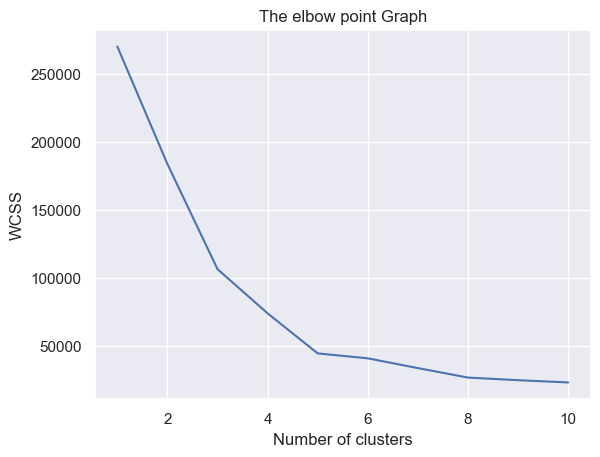

In [14]:
# Plot a elbow graph 

sns.set()
plt.plot(range(1,11),Wcss)
plt.title("The elbow point Graph")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show

### Here we are finding the optimum number of clusters .

IN this the value is min for optimal number of clusters 

in this graph there is two sharp turn one is between 2-4 and other is between 4-6 After that there is no sharp point ( btw sharo oint means elbow point) so the optimum number of clusters for now will be 5 

**Number of clusters = 5**

## Training the K-Means Clustering Model 
K = number of clusters

In [15]:
Kmeans = KMeans(n_clusters=5 , init='k-means++', random_state=0)

# Return a label for each data point 
Y = Kmeans.fit_predict(X)

print(Y)


[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


## Visualizing all the clusters 


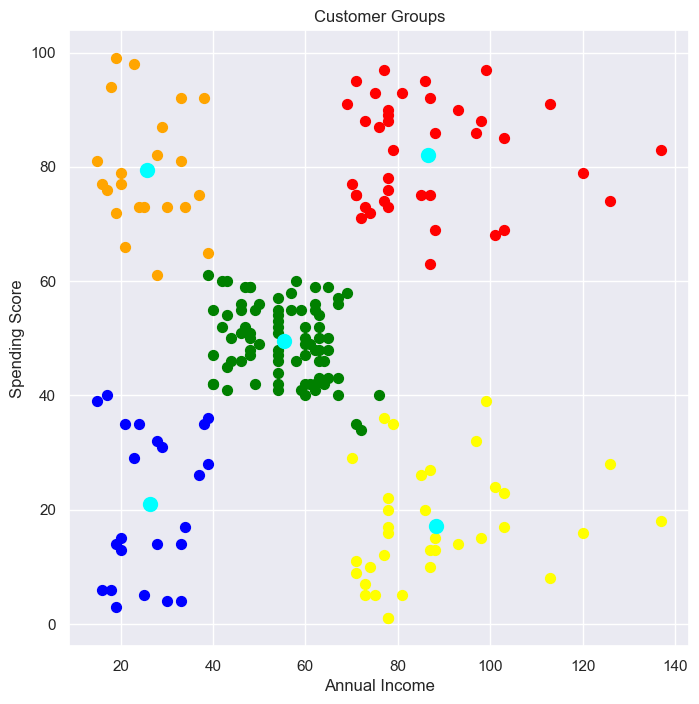

In [21]:
# Plotting all the Clusters and their Centroids
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X [Y==0,1], s = 50 , c='green',label ='Cluster 1' )
plt.scatter(X[Y==1,0], X [Y==1,1], s = 50 , c='red',label ='Cluster 2' )
plt.scatter(X[Y==2,0], X [Y==2,1], s = 50 , c='yellow',label ='Cluster 3' )
plt.scatter(X[Y==3,0], X [Y==3,1], s = 50 , c='blue',label ='Cluster 4' )
plt.scatter(X[Y==4,0], X [Y==4,1], s = 50 , c='orange',label ='Cluster 5' )

# Plot the Centroids
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],s =100, c='cyan',label = 'Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()